
<!-- Adjust the path and filename as per your actual file location -->
<img src="./BA%20plane.jpg" alt="British Airways Plane" style="width: 90%; height: 250px; display: block; margin: auto;">


Web Scraping and Sentiment Analysis
In the digital age, customer sentiment is a crucial indicator of service quality and customer satisfaction. This project focuses on leveraging web scraping techniques to gather customer reviews of British Airways from diverse online platforms. Through sentiment analysis, we aim to categorize these reviews into positive, neutral, and negative sentiments, providing a comprehensive overview of public perception towards the airline.

Using Python scripts for web scraping and sentiment analysis, we extract and preprocess textual data to derive meaningful insights. Our objectives include:

- Scraping and aggregating customer reviews.
- Applying natural language processing techniques to clean and prepare textual data.
- Utilizing sentiment analysis algorithms to quantify and visualize sentiment distributions over time or across different service categories.
- Identifying recurring themes or specific areas (e.g., services, time and comfort) where sentiment is particularly strong.

By understanding the sentiment landscape surrounding British Airways, this analysis aims to support proactive customer engagement strategies, refine service offerings, and strengthen the airline's competitive edge in the aviation industry.

These projects collectively aim to harness data-driven methodologies to foster continuous improvement and strategic decision-making within British Airways, emphasizing the integration of advanced analytics to drive customer-centric initiatives and operational excellence.

# Importing Libraries 

In [1]:
# Importing necessary Libraries 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize 
import nltk
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import seaborn as sns

## Retrieving data

In [2]:
# Loading dataset
reviews = pd.read_csv('B_Airways_reviews.csv')

reviews.head()

,Unnamed: 0,title,date,country,review
0,0,“customer service was awful”,5th July 2024,United Kingdom,Not Verified | The WORST customer experience! ...
1,1,"""over 2 weeks to respond""",1st July 2024,Canada,Not Verified | Had to cancel my flight month...
2,2,“wholly inadequate customer service”,30th June 2024,United Kingdom,✅ Trip Verified | Flight cancelled with no rea...
3,3,“the cabin crew were great”,26th June 2024,United Kingdom,✅ Trip Verified | This is a route I fly regula...
4,4,"""cannot recommend BA""",23rd June 2024,Canada,✅ Trip Verified | While BA may have made some...


In [3]:
# Checking data types 
reviews.dtypes

Unnamed: 0     int64
title         object
date          object
country       object
review        object
dtype: object

# Data cleaning and manipulation

In [4]:
# Checking data summary
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3921 entries, 0 to 3920
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3921 non-null   int64 
 1   title       3921 non-null   object
 2   date        3921 non-null   object
 3   country     3919 non-null   object
 4   review      3921 non-null   object
dtypes: int64(1), object(4)
memory usage: 153.3+ KB


In [5]:
# Dropping additional Index
reviews.drop(columns = 'Unnamed: 0', inplace= True)
reviews.columns
# Handling null values 
reviews.dropna(inplace= True)
# Checking for duplicates 
print('Total number of duplicates found: ',reviews.duplicated().sum())


Total number of duplicates found:  112


In [6]:
# Handling duplicates 
print("Shape before removing duplicates:", reviews.shape)
reviews.drop_duplicates(keep='first', inplace=True)
print("Shape after removing duplicates:", reviews.shape)


Shape before removing duplicates: (3919, 4)
Shape after removing duplicates: (3807, 4)


In [7]:
# Importing numpy 
import numpy as np
# Cleaning text data
reviews['review'] = np.where(reviews['review'].str.startswith('✅ Trip Verified |' or 'Not Verified |' or '❎ Not Verified |' or 'cNot Verified |' ),reviews['review'].str.split('|').str[1],reviews['review'])
# displaying dataset
display(reviews.head())
# Converting date type to datetime
reviews['date'] = pd.to_datetime(reviews.date,infer_datetime_format= True, errors = 'coerce')
# Confirming changes 
assert reviews.date.dtype == '<M8[ns]'

,title,date,country,review
0,“customer service was awful”,5th July 2024,United Kingdom,Not Verified | The WORST customer experience! ...
1,"""over 2 weeks to respond""",1st July 2024,Canada,Not Verified | Had to cancel my flight month...
2,“wholly inadequate customer service”,30th June 2024,United Kingdom,Flight cancelled with no reason given less th...
3,“the cabin crew were great”,26th June 2024,United Kingdom,This is a route I fly regularly. Used first c...
4,"""cannot recommend BA""",23rd June 2024,Canada,While BA may have made some positive improve...


C:\Users\USER\AppData\Local\Temp\ipykernel_3860\1044175561.py:8: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  reviews['date'] = pd.to_datetime(reviews.date,infer_datetime_format= True, errors = 'coerce')


# Understanding data structure 

### Recency and lenght 

In [8]:
# Determining Recent and oldest review 
recent_review = reviews.date.max()
oldest_review = reviews.date.min()
flight_per_country = reviews.country.value_counts(ascending= False)
# Number of flight per country since 2011
print('NUMBER OF FLIGIHT SINCE 2011')
print(f'Recent review: {recent_review} \nOldest review: {oldest_review} \n\n FLIGHT PER COUNTRY TABLE {flight_per_country} \n')
# Maximum and Minimum number flights 
Highest_no_flights = flight_per_country.idxmax()
lowest_no_flights = flight_per_country.idxmin()

print(f'Country with highest flight flown: {Highest_no_flights} \nCountry with lowest flight flown: {lowest_no_flights} \n')

# Determing longest and shortest review
longest_review = max(reviews.review.apply(lambda x: len(x)))
shortest_review = min(reviews.review.apply(lambda x: len(x)))
print(f'Longest_review: {longest_review}\nShortest_review: {shortest_review}')


NUMBER OF FLIGIHT SINCE 2011
Recent review: 2024-07-05 00:00:00 
Oldest review: 2011-10-09 00:00:00 

 FLIGHT PER COUNTRY TABLE country
United Kingdom           2390
United States             429
Australia                 159
Canada                    123
Germany                    66
                         ... 
Panama                      1
Jordan                      1
Vietnam                     1
Saint Kitts and Nevis       1
Oman                        1
Name: count, Length: 72, dtype: int64 

Country with highest flight flown: United Kingdom 
Country with lowest flight flown: Bahrain 

Longest_review: 3537
Shortest_review: 83


<Axes: xlabel='country'>

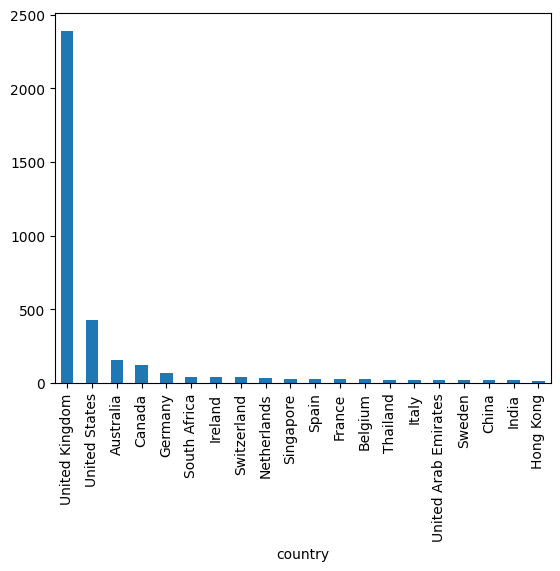

In [9]:
# Plotting flight per country
flight_per_country.head(20).plot(kind= 'bar')
plt.title('Top 20 Countries with highest flights')

We have the United Kingdom has the country with highest review with over 2000 reviews followed by the US and Australia

*# Downloading nltk data collection
nltk.download('all')

# Feature engineering

### Language Detection

In [10]:
# Importing Language detecting library
from langdetect import detect_langs
# Detecting Language 
reviews['language'] = reviews['review'].apply(lambda x: detect_langs(x)[0].lang)
# Checking number of available language
reviews.language.unique()
# Creating language column
map = {'en':'English'}

reviews['language'] = reviews['language'].map(map)


### Tokenizing and Lemmatization

In [11]:
# Tokenizing review 
reviews['review_tokens'] = reviews['review'].apply(lambda x: word_tokenize(x.lower()))
# Initializing Lemmatizer
lemmatizer = WordNetLemmatizer()
# Lemmatizing tokens and creating text column
reviews['text'] = reviews['review_tokens'].apply(lambda tokens: [lemmatizer.lemmatize(i) for i in tokens if i.isalpha()]) # Making sure tokens are only actual words
reviews['text'] = reviews.text.apply(lambda x: ' '.join(x))
reviews.head(5)

,title,date,country,review,language,review_tokens,text
0,“customer service was awful”,2024-07-05,United Kingdom,Not Verified | The WORST customer experience! ...,English,"[not, verified, |, the, worst, customer, exper...",not verified the worst customer experience bri...
1,"""over 2 weeks to respond""",NaT,Canada,Not Verified | Had to cancel my flight month...,English,"[not, verified, |, had, to, cancel, my, flight...",not verified had to cancel my flight month in ...
2,“wholly inadequate customer service”,2024-06-30,United Kingdom,Flight cancelled with no reason given less th...,English,"[flight, cancelled, with, no, reason, given, l...",flight cancelled with no reason given le than ...
3,“the cabin crew were great”,2024-06-26,United Kingdom,This is a route I fly regularly. Used first c...,English,"[this, is, a, route, i, fly, regularly, ., use...",this is a route i fly regularly used first cla...
4,"""cannot recommend BA""",NaT,Canada,While BA may have made some positive improve...,English,"[while, ba, may, have, made, some, positive, i...",while ba may have made some positive improveme...


In [12]:
# Extracting number of words after tokenizing and lemmatizing 
reviews['n_words'] = reviews.text.apply(lambda x : len(x))
reviews.head()

,title,date,country,review,language,review_tokens,text,n_words
0,“customer service was awful”,2024-07-05,United Kingdom,Not Verified | The WORST customer experience! ...,English,"[not, verified, |, the, worst, customer, exper...",not verified the worst customer experience bri...,653
1,"""over 2 weeks to respond""",NaT,Canada,Not Verified | Had to cancel my flight month...,English,"[not, verified, |, had, to, cancel, my, flight...",not verified had to cancel my flight month in ...,465
2,“wholly inadequate customer service”,2024-06-30,United Kingdom,Flight cancelled with no reason given less th...,English,"[flight, cancelled, with, no, reason, given, l...",flight cancelled with no reason given le than ...,395
3,“the cabin crew were great”,2024-06-26,United Kingdom,This is a route I fly regularly. Used first c...,English,"[this, is, a, route, i, fly, regularly, ., use...",this is a route i fly regularly used first cla...,577
4,"""cannot recommend BA""",NaT,Canada,While BA may have made some positive improve...,English,"[while, ba, may, have, made, some, positive, i...",while ba may have made some positive improveme...,1006


# Constructing Stop_words

In [13]:
# Creating list of custom stopwords base on domain knowledge
usa_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 
    'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 
    'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 
    'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 
    'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 
    'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 
    'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'
]
usa_states = [i.lower() for i in usa_states]
usa_cities = [
    'New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 'San Antonio', 
    'San Diego', 'Dallas', 'San Jose', 'Austin', 'Jacksonville', 'Fort Worth', 'Columbus', 
    'Charlotte', 'San Francisco', 'Indianapolis', 'Seattle', 'Denver', 'Washington', 'Boston', 
    'El Paso', 'Nashville', 'Detroit', 'Oklahoma City', 'Portland', 'Las Vegas', 'Memphis', 
    'Louisville', 'Baltimore', 'Milwaukee', 'Albuquerque', 'Tucson', 'Fresno', 'Sacramento', 
    'Kansas City', 'Mesa', 'Atlanta', 'Omaha', 'Colorado Springs', 'Raleigh', 'Miami', 
    'Long Beach', 'Virginia Beach', 'Oakland', 'Minneapolis', 'Tulsa', 'Arlington', 'New Orleans', 
    'Wichita', 'Cleveland', 'Tampa', 'Bakersfield', 'Aurora', 'Honolulu', 'Anaheim', 'Santa Ana', 
    'Corpus Christi', 'Riverside', 'Lexington', 'Stockton', 'Henderson', 'Saint Paul', 'St. Louis', 
    'Cincinnati', 'Pittsburgh', 'Greensboro', 'Anchorage', 'Plano', 'Lincoln', 'Orlando', 'Irvine', 
    'Newark', 'Toledo', 'Durham', 'Chula Vista', 'Fort Wayne', 'Jersey City', 'St. Petersburg', 
    'Laredo', 'Madison', 'Chandler', 'Buffalo', 'Lubbock', 'Scottsdale', 'Reno', 'Glendale', 
    'Gilbert', 'Winston–Salem', 'North Las Vegas', 'Norfolk', 'Chesapeake', 'Garland', 'Irving', 
    'Hialeah', 'Fremont', 'Boise', 'Richmond', 'Baton Rouge', 'Spokane', 'Des Moines','heathrow'
]
usa_cities = [i.lower() for i in usa_cities]

flight_seat_types = [
    'Economy', 'Premium', 'Business', 'First', 'Class', 'Plus', 'Main', 'Cabin', 
    'Extra', 'Basic', 'review', 'airport', 'ba', 'wa', 'u', 'ha'
]
flight_seat_types = [i.lower() for i in flight_seat_types]

others = list(ENGLISH_STOP_WORDS.union(['flight', 'did', 'airline', 'seat', 'seats', 
                                        'ticket', 'tickets', 'boarding', 'gate', 'gates',
                                        'departure', 'arrivals', 'terminal', 'terminals', 
                                        'aircraft', 'plane', 'planes', 'cabin', 'crew',
                                        'staff', 'passengers', 'passenger','service', 
                                        'services', 'customer', 'customers', 'experience',
                                        'experiences','day', 'days','food', 'british', 
                                        'airway', 'airways', 'london', 'time', 'times', 
                                        'hour', 'hours', 'minute', 'minutes', 'year', 'year ago',
                                        'year old']))
combined_list = usa_states + usa_cities + flight_seat_types + others

In [14]:
# Specifying token pattern
token_pattern = r'\b[^\d\W][^\d\W][^\d\W]+\b'
stop_word = combined_list
# Creating Bag of Words (BOW)
vect = CountVectorizer(max_features=1000,token_pattern=token_pattern,ngram_range= (1,2), stop_words=stop_word)
# Fitting Vectorizer and transform data
X = vect.fit_transform(reviews.text)
# Creating frequency table dataframe
freq_table = pd.DataFrame(X.toarray(),columns=vect.get_feature_names_out())
display(freq_table)

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ago', 'ana', 'angeles', 'antonio', 'baton', 'beach', 'carolina', 'christi', 'chula', 'city', 'corpus', 'dakota', 'des', 'diego', 'fort', 'francisco', 'hampshire', 'island', 'jersey', 'jose', 'las', 'long', 'los', 'louis', 'mexico', 'moines', 'new', 'north', 'old', 'orleans', 'paso', 'paul', 'petersburg', 'rhode', 'rouge', 'saint', 'salem', 'san', 'santa', 'south', 'springs', 'vegas', 'vista', 'wayne', 'west', 'winston', 'worth', 'york'] not in stop_words.
  warnings.warn(


,able,absolute,absolutely,accept,acceptable,access,actually,add,additional,adequate,...,world traveller,worn,worse,worst,worth,wrong,yes,york,young,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3804,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Word frequency

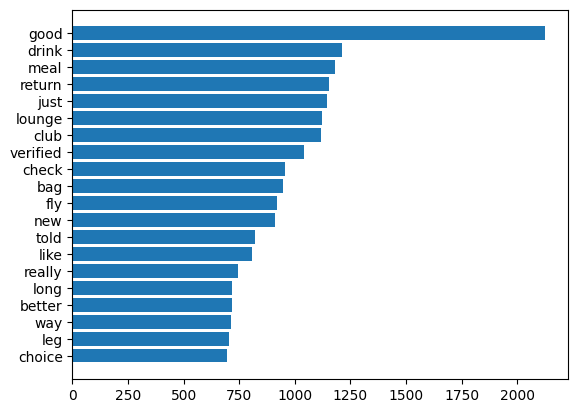

In [15]:
# Word frequency table
word_freq = freq_table.reset_index().melt(id_vars=['index'], value_vars=freq_table.columns[1:], var_name='words', value_name='frequency')
# Filtering out words with zero frequency
word_freq = word_freq[word_freq['frequency'] > 0].drop(columns= ['index'])  # Filter out zero frequencies
# Extracting top 20 most frequent words
top20_words = word_freq.groupby('words', as_index= False)['frequency'].sum().sort_values(by= 'frequency', ascending= False).head(20)
# sorting frequent words 
sorted_top20_words = top20_words.sort_values(by='frequency')
# Plotting frequent words
plt.barh(sorted_top20_words.words,sorted_top20_words.frequency)
plt.title('Top 20 frequent words')
plt.show()

### WordCloud

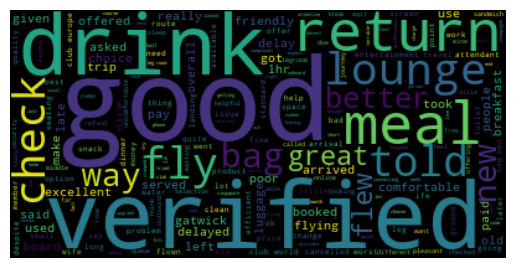

In [16]:
# Creating WordCloud
my_stopwords = STOPWORDS.update(combined_list)
cloud = WordCloud(stopwords= my_stopwords).generate(' '.join(reviews.text))
# Displaying WordCloud
plt.imshow(cloud, interpolation= 'bilinear')
plt.axis(False)
plt.title('Word cloud of frequent words')
plt.show()

### Extracting sentiment

In [17]:
# Generating sentiments
reviews['sentiment'] = reviews.text.apply(lambda x : TextBlob(x).sentiment.polarity)
reviews['sentiment'] = np.where(reviews.sentiment > 0, 1 ,reviews.sentiment)
reviews['sentiment'] = np.where(reviews.sentiment < 0, -1 ,reviews.sentiment)

reviews.head()

,title,date,country,review,language,review_tokens,text,n_words,sentiment
0,“customer service was awful”,2024-07-05,United Kingdom,Not Verified | The WORST customer experience! ...,English,"[not, verified, |, the, worst, customer, exper...",not verified the worst customer experience bri...,653,1.0
1,"""over 2 weeks to respond""",NaT,Canada,Not Verified | Had to cancel my flight month...,English,"[not, verified, |, had, to, cancel, my, flight...",not verified had to cancel my flight month in ...,465,1.0
2,“wholly inadequate customer service”,2024-06-30,United Kingdom,Flight cancelled with no reason given less th...,English,"[flight, cancelled, with, no, reason, given, l...",flight cancelled with no reason given le than ...,395,-1.0
3,“the cabin crew were great”,2024-06-26,United Kingdom,This is a route I fly regularly. Used first c...,English,"[this, is, a, route, i, fly, regularly, ., use...",this is a route i fly regularly used first cla...,577,1.0
4,"""cannot recommend BA""",NaT,Canada,While BA may have made some positive improve...,English,"[while, ba, may, have, made, some, positive, i...",while ba may have made some positive improveme...,1006,-1.0


### Plotting sentiment

there are 16 not visible on the plot below due to scaling


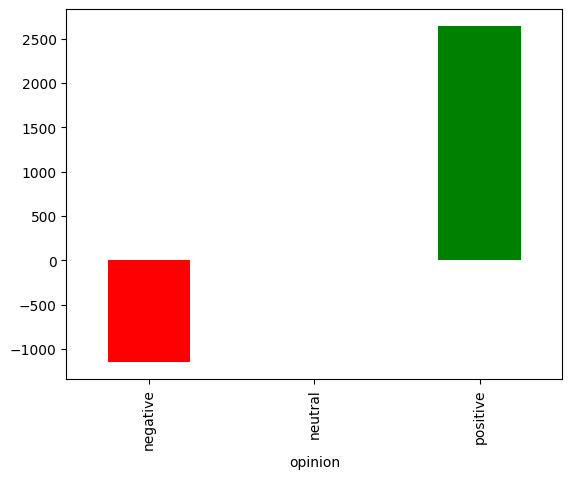

In [18]:
# Creating categorical labels for sentiments 
map = {-1: 'negative', 0: 'neutral', 1: 'positive'}
# mapping categories
reviews['opinion'] = reviews.sentiment.map(map)
# Plotting count of sentiments 
reviews.groupby('opinion')['sentiment'].sum().plot(kind= 'bar',color=['red', 'blue', 'green'],title= 'Sentiment count')
# Hightlight non visible sentiment
neutral_reviews = reviews[reviews.sentiment==0].shape[0]
print(f'there are {neutral_reviews} not visible on the plot below due to scaling')

In [19]:
# Creating scores for predicting sentiments
reviews['score'] = reviews.sentiment
reviews['score'] = np.where(reviews.score > 0, 1, reviews.score)
reviews['score'] = np.where(reviews.score < 0, 0, reviews.score)
reviews.head(3)

,title,date,country,review,language,review_tokens,text,n_words,sentiment,opinion,score
0,“customer service was awful”,2024-07-05,United Kingdom,Not Verified | The WORST customer experience! ...,English,"[not, verified, |, the, worst, customer, exper...",not verified the worst customer experience bri...,653,1.0,positive,1.0
1,"""over 2 weeks to respond""",NaT,Canada,Not Verified | Had to cancel my flight month...,English,"[not, verified, |, had, to, cancel, my, flight...",not verified had to cancel my flight month in ...,465,1.0,positive,1.0
2,“wholly inadequate customer service”,2024-06-30,United Kingdom,Flight cancelled with no reason given less th...,English,"[flight, cancelled, with, no, reason, given, l...",flight cancelled with no reason given le than ...,395,-1.0,negative,0.0


# Predicting Sentiment

### Data Preprocessing

In [20]:
# Import Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [21]:
# Cnncatinating data for prediction
model_data = pd.concat([freq_table,reviews[['n_words','score']]],axis= 1)
# Transforming data
imputer  = SimpleImputer(strategy= 'median')
model_data = pd.DataFrame(imputer.fit_transform(model_data),columns= imputer.get_feature_names_out())

model_data.head()


,able,absolute,absolutely,accept,acceptable,access,actually,add,additional,adequate,...,worse,worst,worth,wrong,yes,york,young,zero,n_words,score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,653.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,465.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,395.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,577.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1006.0,0.0


Becareful of what strategy is being applied for as to avoid having target variable deviative from classification type label as the output of 'mean' strategy in particular tends to result in a continous type  

### Model creation and Evaluation

In [22]:
# Assigning dependent variable and target variable
X = model_data.drop('score', axis = 1)
y = model_data['score']
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3, random_state= 42)
# Initializing Model
log_reg = LogisticRegression(penalty= 'l2', C=200)
log_reg.fit(X_train,y_train)
# Prediting and Evaluating model
y_predicted = log_reg.predict(X_test)
print('training set score: ', log_reg.score(X_train,y_train))
print('Model accuracy: ', accuracy_score(y_test, y_predicted))
print('Model Report:\n', classification_report(y_test,y_predicted))

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


training set score:  0.7758746355685131
Model accuracy:  0.6355140186915887
Model Report:
               precision    recall  f1-score   support

         0.0       0.30      0.18      0.22       347
         1.0       0.71      0.83      0.76       830

    accuracy                           0.64      1177
   macro avg       0.50      0.50      0.49      1177
weighted avg       0.59      0.64      0.60      1177



# Challenges Encountered
1. Imbalanced Dataset: A significant challenge was the imbalance in the number of positive, negative, and neutral reviews, which may have affected the model's ability to learn from all classes equally.
2. Text Standardization: Ensuring consistent and accurate lemmatization and tokenization of reviews required extensive preprocessing, given the diversity in language use and formatting.
3. Stop Words Selection: Creating a comprehensive list of stopwords to filter out uninformative words without losing context-specific information was challenging.


# Additional Recommendations for Sentiment Prediction
1.	Model Tuning:
    Experiment with different machine learning models such as Random Forest, Gradient Boosting, or Support Vector Machines to compare performance.
    Fine-tune hyperparameters of the Logistic Regression model (e.g., penalty type, regularization strength) using techniques such as Grid Search or Random Search to enhance model performance.
2.	Dataset Scaling:
    Normalize or standardize the dataset to ensure that features are on a similar scale, which can improve model performance and convergence.
3.	Cross-Validation:
    Implement cross-validation to ensure the model's robustness and generalizability across different subsets of the data
